In [39]:
%matplotlib nbagg
import numpy as np
from skimage import filters,io, morphology, segmentation,exposure,feature,img_as_float,measure
import joblib
from matplotlib import pyplot as plt
from scipy import ndimage as nd
from sympy import Point,Line

In [2]:
# Define the image filepath
Img_fpath='/Users/simone/Downloads/GAPDH-Atto550-single slice_Reconstructed.tif'

In [3]:
# Load the image
Img=io.imread(Img_fpath)

In [26]:
# Convert the image to float
Img=img_as_float(Img)

<IPython.core.display.Javascript object>


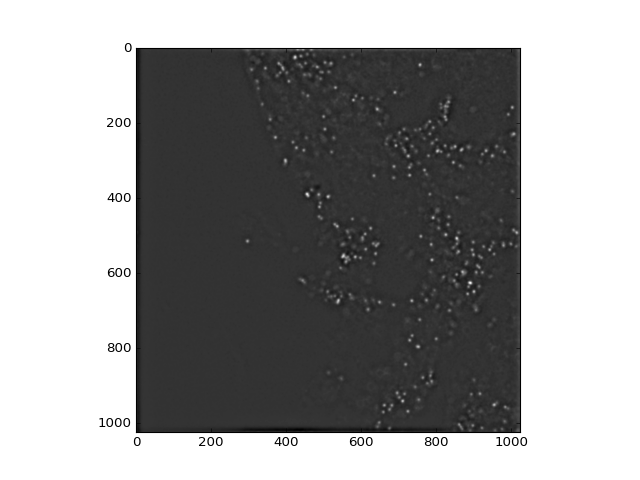

In [88]:
plt.figure()
plt.imshow(Img,cmap='gray')

In [28]:
# Remove the background from the image
Background=filters.gaussian(Img,sigma=10,mode='wrap')
ImgCleaned=Img-Background
ImgCleaned[ImgCleaned<0]=0

<IPython.core.display.Javascript object>


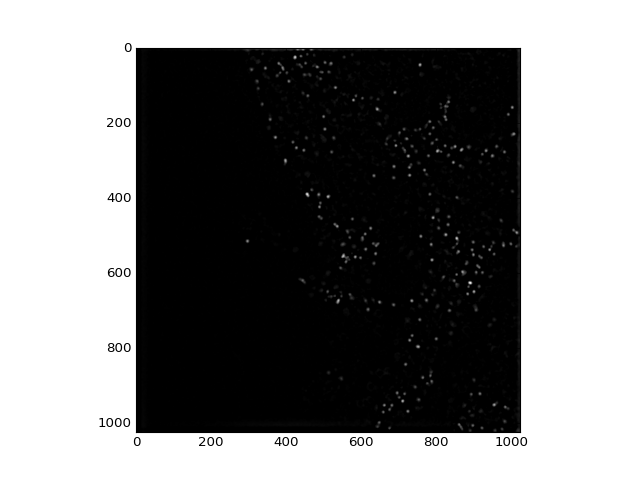

In [29]:
plt.figure()
plt.imshow(ImgCleaned,cmap='gray')

In [34]:
# Enhance the dots. It may not be necessary for your image
ImgLOG=nd.filters.gaussian_laplace(ImgCleaned,sigma=1)
ImgLOG=-ImgLOG # the peaks are negative so invert the signal
ImgLOG[ImgLOG<0]=0 # All negative values set to zero 

<IPython.core.display.Javascript object>


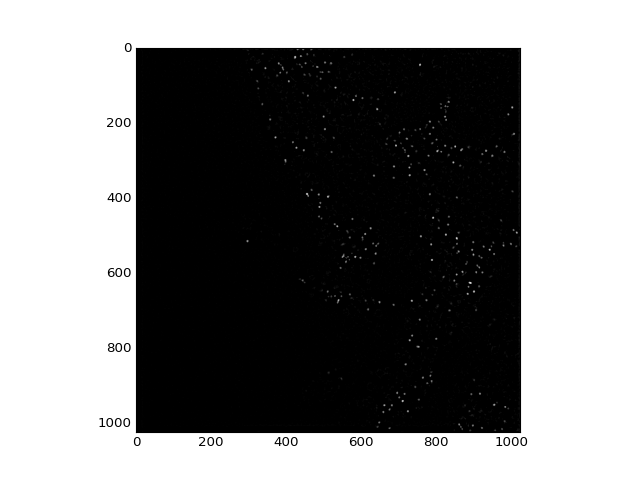

In [87]:
plt.figure()
plt.imshow(ImgLOG,cmap='gray')

In [96]:
# Define threshold
Selected_Thr=0.000083928

In [97]:
# Get the max peak
peaks=feature.peak_local_max(ImgLOG,min_distance=3,threshold_abs=Selected_Thr,exclude_border=True, indices=True, num_peaks=np.inf, footprint=None,labels=None)

In [99]:
print('Total peaks= ',len(peaks))

Total peaks=  350


<IPython.core.display.Javascript object>


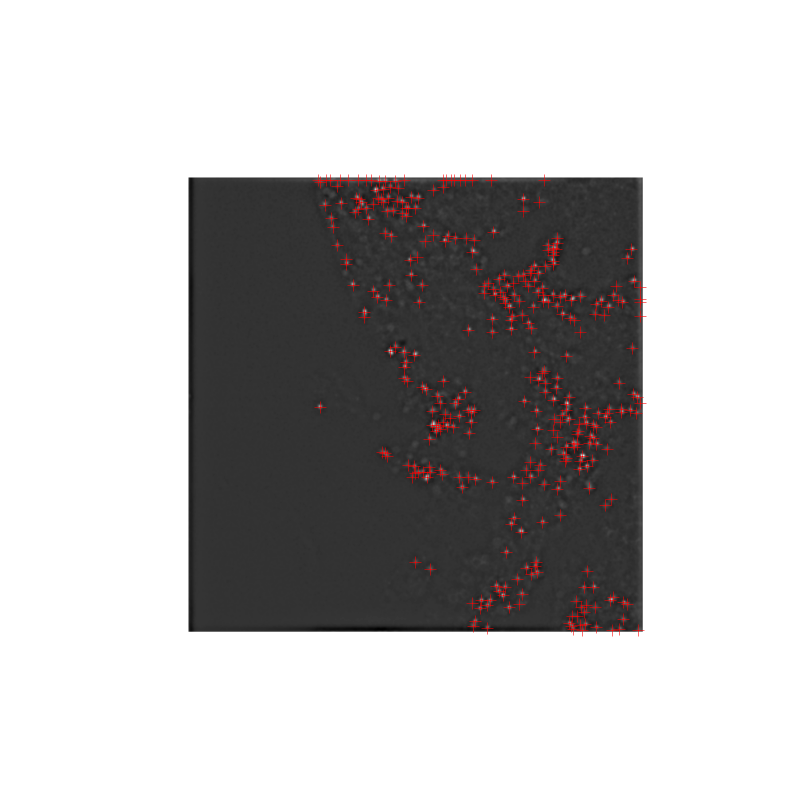

In [98]:
# Visualize the selected peaks
fig=plt.figure(figsize=(10,10))
plt.imshow(Img,cmap='gray')
plt.axis('off')
plt.plot(peaks[:,1],peaks[:,0],'r+',markersize=10)